# Лабораторная работа № 8
### Вариант № 7

Используя схемы переменных направлений и дробных шагов, решить двумерную начально-краевую задачу для дифференциального уравнения параболического типа. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,y,t)$. Исследовать зависимость погрешности от сеточных параметров $\tau$, $h_x, h_y$.

**_Уравнение:_**
$$\frac{\partial u}{\partial t} = a\frac{\partial^2 u}{\partial x^2} + a\frac{\partial^2 u}{\partial y^2}-xy\sin(t), a>0$$

**_Граничные условия:_**
$$u(x, 0, t) = 0,$$
$$u(x, 1, t) = x\cos(t)$$
$$u(0,y,t) = 0,$$
$$u(1, y, t) =y\cos(t),$$
$$u(x, y, 0) = xy$$

**_Аналитическое решение:_**
$$U(x,y,t) = xy\cos(t)$$

## Решение
**Импорты:**

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
plt.rcParams['figure.figsize'] = [10, 20]

**Параметры:**

In [2]:
Nx = 50
Ny = 50
Nt = 30
a = 1
lx = 1
ly = 1
T = 2
#-----------------#
hx = lx/Nx
hy = ly/Ny
tau = T/Nt

**Граничные условия и аналитическое решение**

In [3]:
def phi1(x, t):
    return 0

def phi2(x, t):
    return x*np.cos(t)

def phi3(y, t):
    return 0

def phi4(y, t):
    return y*np.cos(t)

def psi(x, y):
    return x*y

def f(x, y, t):
    return -x*y*np.sin(t)

def U(x, y, t):
    return x*y*np.cos(t)

### Вспомогательные функции
**Вычисление ошибки (через max):**

In [4]:
def norm(v1, v2):
    return np.amax(np.abs(v1 - v2))

def Error(Nx, Ny, Nt, hx, hy, tau, U, mesh):
    errors = np.zeros(Nt+1)
    for t in range(Nt+1):
        u_correct = np.zeros((Nx+1, Ny+1))
        for x in range(Nx+1):
            for y in range(Ny+1):
                u_correct[x][y] = U(x*hx, y*hy, t*tau)
        u_calculated = mesh[t]
        errors[t] = norm(u_correct, u_calculated)

    return errors

def error(Nt, l, tau, U):
    N_array = [10, 20, 40]
    size = np.size(N_array)
    h_array = np.zeros(size)

    errors1x = np.zeros(size)
    errors2x = np.zeros(size)
    errors1y = np.zeros(size)
    errors2y = np.zeros(size)

    for i in range(0, size):
        h_array[i] = l/N_array[i]
        x_array = np.arange(0, l + h_array[i], h_array[i])
        y_array = np.arange(0, l + h_array[i], h_array[i])

        u1 = VariableDirectionMethod(Nt, N_array[i], N_array[i], tau, h_array[i], h_array[i])
        u2 = FractionalStepsMethod(Nt, N_array[i], N_array[i], tau, h_array[i], h_array[i])

        t = tau * Nt/2
        x = h_array[i] * N_array[i]/2
        y = h_array[i] * N_array[i]/2

        if (np.size(x_array)!=N_array[i]+1):
            x_array = x_array[N_array[i]+1]
            y_array = y_array[N_array[i]+1]

        ux_correct = np.array([U(x_i*h_array[i], y, t) for x_i in range(N_array[i]+1)])
        uy_correct = np.array([U(x, y_i*h_array[i], t) for y_i in range(N_array[i]+1)])
        u1x_calculated = u1[int(Nt / 2)][:][int(N_array[i]/2)]
        u2x_calculated = u2[int(Nt / 2)][:][int(N_array[i]/2)]
        u1y_calculated = u1[int(Nt / 2)][int(N_array[i]/2)][:]
        u2y_calculated = u2[int(Nt / 2)][int(N_array[i]/2)][:]

        errors1x[i] = np.amax(np.abs(ux_correct - u1x_calculated))
        errors2x[i] = np.amax(np.abs(ux_correct - u2x_calculated))
        errors1y[i] = np.amax(np.abs(uy_correct - u1y_calculated))
        errors2y[i] = np.amax(np.abs(uy_correct - u2y_calculated))

    return N_array, errors1x, errors2x, errors1y, errors2y

**Построение графика:**

In [5]:
def show_solution(Nx, Ny, Nt, hx, hy, tau, U, mesh, errors):
    x_array = np.array([i*hx for i in range(Nx+1)])
    y_array = np.array([j*hy for j in range(Ny+1)])

    fig, ax = plt.subplots(3)

    t = [int(Nt*0.05), int(Nt*0.4), int(Nt*0.7)]
    x_fix = int(Nx/2)
    y_fix = int(Ny/4)
    colors = ['blue', 'green', 'red']

    for i in range(len(t)):
        u_correct = np.zeros(Nx+1)
        for x in range(Nx+1):
            u_correct[x] = U(x*hx, y_fix*hy, t[i]*tau)
        u_calculated = mesh[t[i]][:][y_fix]
        
        ax[0].plot(y_array, u_correct, color='black')
        ax[0].plot(y_array, u_calculated, color=colors[i], linestyle = '--', label='t=%s'%round(t[i]*tau, 2))
    
    for i in range(len(t)):
        u_correct = np.zeros(Ny+1)
        for y in range(Ny+1):
            u_correct[y] = U(x_fix*hx, y*hy, t[i]*tau)
        u_calculated = mesh[t[i]][x_fix][:]
        
        ax[1].plot(y_array, u_correct, color='black')
        ax[1].plot(y_array, u_calculated, color=colors[i], linestyle = '--', label='t=%s'%round(t[i]*tau, 2))
        
    label1 = 'x (y_fix=%s)'%round(y_fix*hy, 2)
    label2 = 'y (x_fix=%s)'%round(x_fix*hx, 2)
    ax[0].set_xlabel(label1)
    ax[0].set_ylabel('U(x, y, t)')
    ax[0].grid()
    ax[0].legend()
    ax[1].set_xlabel(label2)
    ax[1].set_ylabel('U(x, y, t)')
    ax[1].grid()
    ax[1].legend()
    
    t_array = np.array([i*tau for i in range(Nt+1)])
    ax[2].plot(t_array[:-1], errors[:-1], color='blue')
    ax[2].set_xlabel('t')
    ax[2].set_ylabel('error')
    ax[2].grid()

In [21]:
def show_errors(Nt, l, tau, U):
    N_array, errors1x, errors2x, errors1y, errors2y = error(Nt, l, tau, U)

    colors = ['blue', 'red']

    delta = np.zeros(np.size(N_array))
    for i in range(np.size(N_array)):
        delta[len(N_array)-i-1] = l / N_array[i]

    fig, ax = plt.subplots(1, 2)
    ax[0].plot(delta, errors1x, color=colors[0], label='Метод переменных направлений')
#    plt.plot(delta, errors2x, color=colors[1], label='Метод дробных шагов')
    ax[0].set_xlabel('delta X')
    ax[0].set_ylabel('Epsilon')
    ax[0].grid()
    ax[0].legend()
    #plt.show()

    #fig, ax = plt.subplots()
    ax[1].plot(delta, errors1y, color=colors[0], label='Метод переменных направлений')
#    plt.plot(delta, errors2y, color=colors[1], label='Метод дробных шагов')
    ax[1].set_xlabel('delta Y')
    ax[1].set_ylabel('Epsilon')
    ax[1].grid()
    ax[1].legend()
    plt.show()

### Метод переменных направлений

In [7]:
def VariableDirectionMethod(Nt, Nx, Ny, tau, hx, hy):
    mesh = np.zeros((Nt+1, Nx+1, Ny+1))

    # Заполняем краевые условия 1-го рода
    for t in range(Nt+1):
        for x in range(Nx+1):
            mesh[t][x][0] = phi1(x*hx, t*tau)
            mesh[t][x][Ny] = phi2(x*hx, t*tau)
    
    for t in range(Nt+1):
        for y in range(Ny+1):
            mesh[t][0][y] = phi3(y*hy, t*tau)
            mesh[t][Nx][y] = phi4(y*hy, t*tau)
    
    for x in range(Nx+1):
        for y in range(Ny+1):
            mesh[0][x][y] = psi(y*hy, x*hx)

    # Выполнение схемы метода переменных направлений
    for t in range(Nt):
        # Первый дробный шаг
        tmp = deepcopy(mesh[t]) # Временная переменная для хранения промежуточного состояния на шаге tau+1/2
        for y in range(1, Ny):
            # Заполнение матрицы для метода прогонки на 1-ом дробном шаге
            matrix = np.zeros((Nx-1, Nx-1))
            d = np.zeros(Nx-1)
            a_i = a*tau/(2*hx*hx)
            b_i = -(a*tau/(hx*hx)+1)
            c_i = a*tau/(2*hx*hx)

            # Первая строка
            matrix[0][0] = b_i
            matrix[0][1] = c_i
            d[0] = -(mesh[t][1][y]+(a*tau/(2*hy*hy))*(mesh[t][1][y-1]-2*mesh[t][1][y]+mesh[t][1][y+1])+a*tau/(2*hx*hx)*phi3(y*hy, (t+1/2)*tau)+(tau/2)*f(hx, hy*y, tau*t)/2)

            # Строки с первой по N-2
            for x in range(1, Nx-2):
                matrix[x][x-1] = a_i
                matrix[x][x] = b_i
                matrix[x][x+1] = c_i
                d[x] = -(mesh[t][x+1][y]+(a*tau/(2*hy*hy))*(mesh[t][x+1][y-1]-2*mesh[t][x+1][y]+mesh[t][x+1][y+1])+(tau/2)*f(hx*(x+1), hy*y, tau*t)/2)
            
            # Последняя строка
            matrix[Nx-2][Nx-3] = a_i
            matrix[Nx-2][Nx-2] = b_i
            d[Nx-2] = -(mesh[t][Nx-1][y]+(a*tau/(2*hy*hy))*(mesh[t][Nx-1][y-1]-2*mesh[t][Nx-1][y]+mesh[t][Nx-1][y+1])+a*tau/(2*hx*hx)*phi4(y*hy, (t+1/2)*tau)+(tau/2)*f(hx*(Nx-1), hy*y, t*tau)/2)

            # Решем СЛАУ методом прогонки
            solve = np.linalg.solve(matrix, d)
            p = tmp[1:Nx, y]
            tmp[1:Nx, y] = solve
        
        # Меняем краевые условия во временном массиве на шаге tau+1/2
        tmp[0][:] = np.array([phi3(j*hy, (t+1/2)*tau) for j in range(Ny+1)])
        tmp[Nx][:] = np.array([phi4(j*hy, (t+1/2)*tau) for j in range(Ny+1)])
        tmp[:][0] = np.array([phi1(i*hx, (t+1/2)*tau) for i in range(Nx+1)])
        tmp[:][Ny] = np.array([phi2(i*hx, (t+1/2)*tau) for i in range(Nx+1)])
        
        # Второй дробный шаг
        for x in range(1, Nx):
            # Заполнение матрицы для метода прогонки на 2-ом дробном шаге
            matrix = np.zeros((Ny-1, Ny-1))
            d = np.zeros(Ny-1)
            a_i = a*tau/(2*hy*hy)
            b_i = -(a*tau/(hy*hy)+1)
            c_i = a*tau/(2*hy*hy)

            # Первая строка
            matrix[0][0] = b_i
            matrix[0][1] = c_i
            d[0] = -(tmp[x][1]+(a*tau/(2*hx*hx))*(tmp[x-1][1]-2*tmp[x][1]+tmp[x+1][1])+a*tau/(2*hy*hy)*phi1(x*hx, (t+1)*tau)+(tau/2)*f(x*hx, hy, t*tau)/2)

            # Строки с первой по N-2
            for y in range(1, Ny-2):
                matrix[y][y-1] = a_i
                matrix[y][y] = b_i
                matrix[y][y+1] = c_i
                d[y] = -(tmp[x][y+1]+(a*tau/(2*hx*hx))*(tmp[x-1][y+1]-2*tmp[x][y+1]+tmp[x+1][y+1])+(tau/2)*f(x*hx, hy*(y+1), t*tau)/2)
            
            # Последняя строка
            matrix[Ny-2][Ny-3] = a_i
            matrix[Ny-2][Ny-2] = b_i
            d[Ny-2] = -(tmp[x][Ny-1]+(a*tau/(2*hx*hx))*(tmp[x-1][Ny-1]-2*tmp[x][Ny-1]+tmp[x+1][Ny-1])+a*tau/(2*hy*hy)*phi2(x*hx, (t+1)*tau)+(tau/2)*f(x*hx, hy*(Ny-1), t*tau)/2)

            # Решем СЛАУ методом прогонки
            solve = np.linalg.solve(matrix, d)
            mesh[t+1, x, 1:Ny] = solve

    return mesh

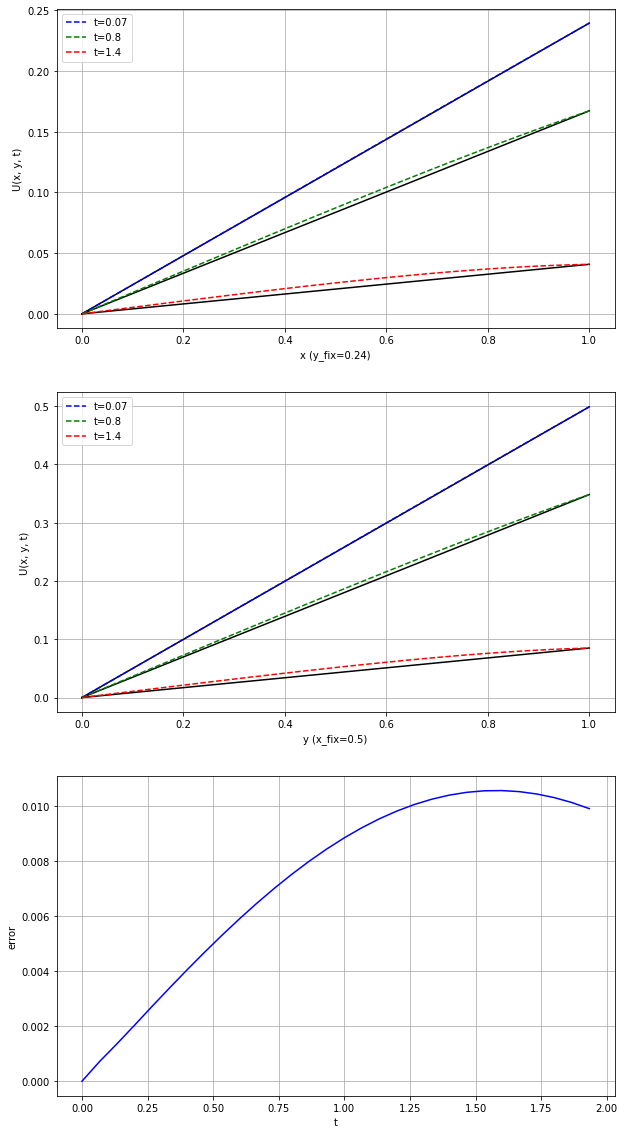

In [8]:
mesh1 = VariableDirectionMethod(Nt, Nx, Ny, tau, hx, hy)
err1 = Error(Nx, Ny, Nt, hx, hy, tau, U, mesh1)
show_solution(Nx, Ny, Nt, hx, hy, tau, U, mesh1, err1)

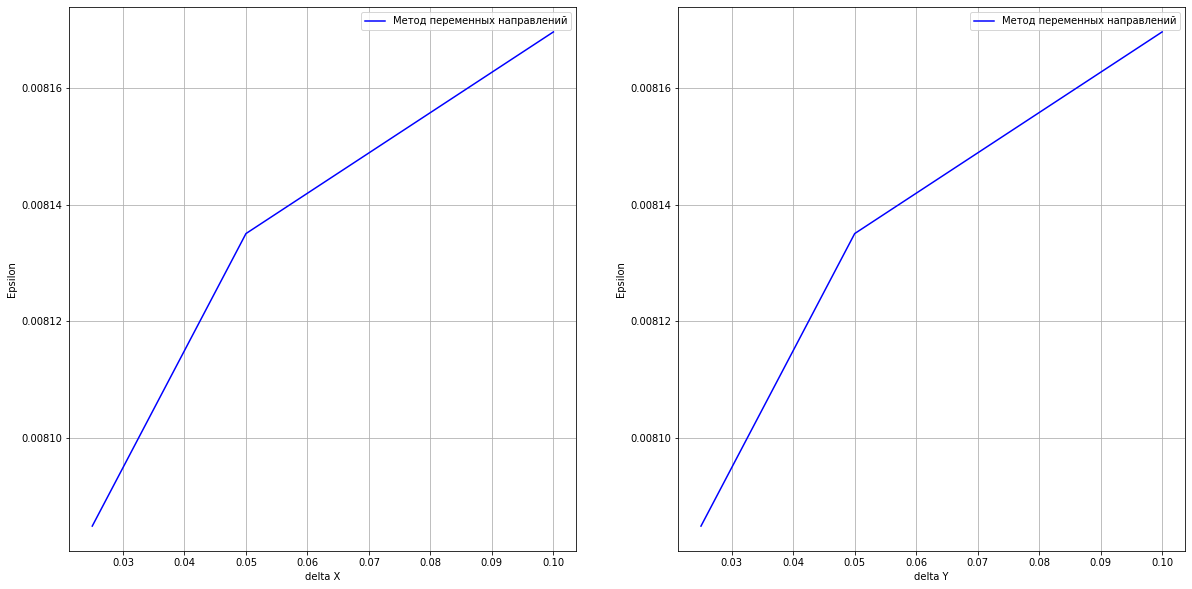

In [28]:
plt.rcParams['figure.figsize'] = [20, 10]
show_errors(Nt, lx, tau, U)

---
### Метод дробных шагов

In [12]:
def FractionalStepsMethod(Nt, Nx, Ny, tau, hx, hy):
    mesh = np.zeros((Nt+1, Nx+1, Ny+1))

    # Заполняем краевые условия 1-го рода
    for t in range(Nt+1):
        for x in range(Nx+1):
            mesh[t][x][0] = phi1(x*hx, t*tau)
            mesh[t][x][Ny] = phi2(x*hx, t*tau)
    
    for t in range(Nt+1):
        for y in range(Ny+1):
            mesh[t][0][y] = phi3(y*hy, t*tau)
            mesh[t][Nx][y] = phi4(y*hy, t*tau)
    
    for x in range(Nx+1):
        for y in range(Ny+1):
            mesh[0][x][y] = psi(y*hy, x*hx)

    for t in range(Nt):
        # Первый дробный шаг
        tmp = deepcopy(mesh[t]) # Временная переменная для хранения промежуточного состояния на шаге tau+1/2
        for y in range(1, Ny):
            # Заполнение матрицы для метода прогонки на 1-ом дробном шаге
            matrix = np.zeros((Nx-1, Nx-1))
            d = np.zeros(Nx-1)
            a_i = a*tau/(hx*hx)
            b_i = -(2*a*tau/(hx*hx)+1)
            c_i = a*tau/(hx*hx)

            # Первая строка
            matrix[0][0] = b_i
            matrix[0][1] = c_i
            d[0] = -(mesh[t][1][y]+a*tau/(hx*hx)*phi3(y*hy, (t+1/2)*tau)+(tau/2)*f(hx, hy*y, tau*t)/2)

            # Строки с первой по N-2
            for x in range(1, Nx-2):
                matrix[x][x-1] = a_i
                matrix[x][x] = b_i
                matrix[x][x+1] = c_i
                d[x] = -(mesh[t][x+1][y]+(tau/2)*f(hx*(x+1), hy*y, tau*t)/2)
            
            # Последняя строка
            matrix[Nx-2][Nx-3] = a_i
            matrix[Nx-2][Nx-2] = b_i
            d[Nx-2] = -(mesh[t][Nx-1][y]+a*tau/(2*hx*hx)*phi4(y*hy, (t+1/2)*tau)+(tau/2)*f(hx*(Nx-1), hy*y, t*tau)/2)

            # Решем СЛАУ методом прогонки
            solve = np.linalg.solve(matrix, d)
            p = tmp[1:Nx, y]
            tmp[1:Nx, y] = solve
        
        # Меняем краевые условия во временном массиве на шаге tau+1/2
        tmp[0][:] = np.array([phi3(j*hy, (t+1/2)*tau) for j in range(Ny+1)])
        tmp[Nx][:] = np.array([phi4(j*hy, (t+1/2)*tau) for j in range(Ny+1)])
        tmp[:][0] = np.array([phi1(i*hx, (t+1/2)*tau) for i in range(Nx+1)])
        tmp[:][Ny] = np.array([phi2(i*hx, (t+1/2)*tau) for i in range(Nx+1)])
        
        # Второй дробный шаг
        for x in range(1, Nx):
            # Заполнение матрицы для метода прогонки на 2-ом дробном шаге
            matrix = np.zeros((Ny-1, Ny-1))
            d = np.zeros(Ny-1)
            a_i = a*tau/(hy*hy)
            b_i = -(2*a*tau/(hy*hy)+1)
            c_i = a*tau/(hy*hy)

            # Первая строка
            matrix[0][0] = b_i
            matrix[0][1] = c_i
            d[0] = -(tmp[x][1]+a*tau/(hy*hy)*phi1(x*hx, (t+1)*tau)+(tau/2)*f(x*hx, hy, t*tau)/2)

            # Строки с первой по N-2
            for y in range(1, Ny-2):
                matrix[y][y-1] = a_i
                matrix[y][y] = b_i
                matrix[y][y+1] = c_i
                d[y] = -(tmp[x][y+1]+(tau/2)*f(x*hx, hy*(y+1), t*tau)/2)
            
            # Последняя строка
            matrix[Ny-2][Ny-3] = a_i
            matrix[Ny-2][Ny-2] = b_i
            d[Ny-2] = -(tmp[x][Ny-1]+a*tau/(hy*hy)*phi2(x*hx, (t+1)*tau)+(tau/2)*f(x*hx, hy*(Ny-1), t*tau)/2)

            # Решем СЛАУ методом прогонки
            solve = np.linalg.solve(matrix, d)
            mesh[t+1, x, 1:Ny] = solve

    return mesh

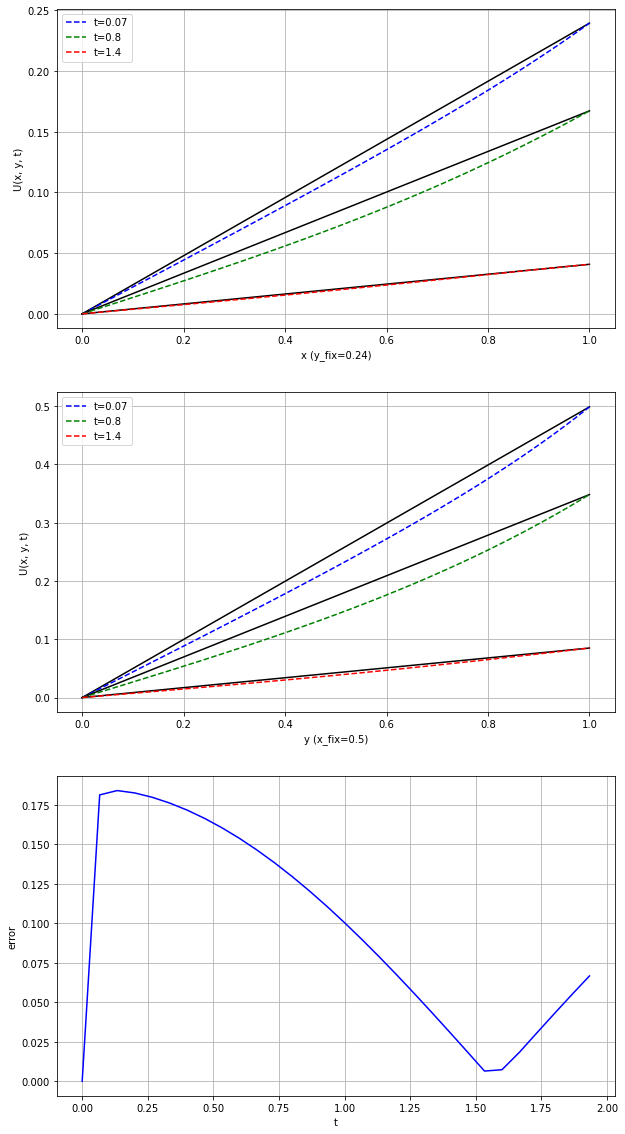

In [13]:
mesh2 = FractionalStepsMethod(Nt, Nx, Ny, tau, hx, hy)
err2 = Error(Nx, Ny, Nt, hx, hy, tau, U, mesh2)
show_solution(Nx, Ny, Nt, hx, hy, tau, U, mesh2, err2)